In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import os
cwd = os.getcwd()
cwd

'/data22/bde/Git/forks/Informer2020'

In [2]:
PATH = cwd
# MM15 informer_4G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0
# CQI informer_5G_a_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1
# 5G Download informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1
# 5g Berlin   informer_5G_b_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0
DATA = 'informer_5G_b_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0'

In [3]:
metrics = np.load(f'{PATH}/results/{DATA}/metrics.npy')
metrics

array([1.4058268e+06, 4.4200954e+12, 2.1024022e+06, 6.4530820e-01,
       8.5692810e+01], dtype=float32)

In [4]:
real_prediction = np.load(f'{PATH}/results/{DATA}/real_prediction.npy')
real_prediction

array([[[7964365.]]], dtype=float32)

In [5]:
true = np.load(f'{PATH}/results/{DATA}/true.npy')
pred = np.load(f'{PATH}/results/{DATA}/pred.npy')

print(true.shape)
print(pred.shape)

(12192, 1, 1)
(12192, 1, 1)


In [6]:
df_true = pd.DataFrame.from_records(true)
df_true.head()

,0
0,[15700000.0]
1,[21500000.0]
2,[14200000.0]
3,[14900000.0]
4,[14000000.0]


In [7]:
df_pred = pd.DataFrame.from_records(pred)
df_pred.head()

,0
0,[16046696.0]
1,[18682830.0]
2,[17333310.0]
3,[16176706.0]
4,[15567284.0]


used true[1:], pred[1:] and shifted[1:]
mse for true vs pred: 4420447764480.0, true vs shifted 6442067689472.0
mae for true vs pred: 1405913.625, true vs shifted 1557115.625


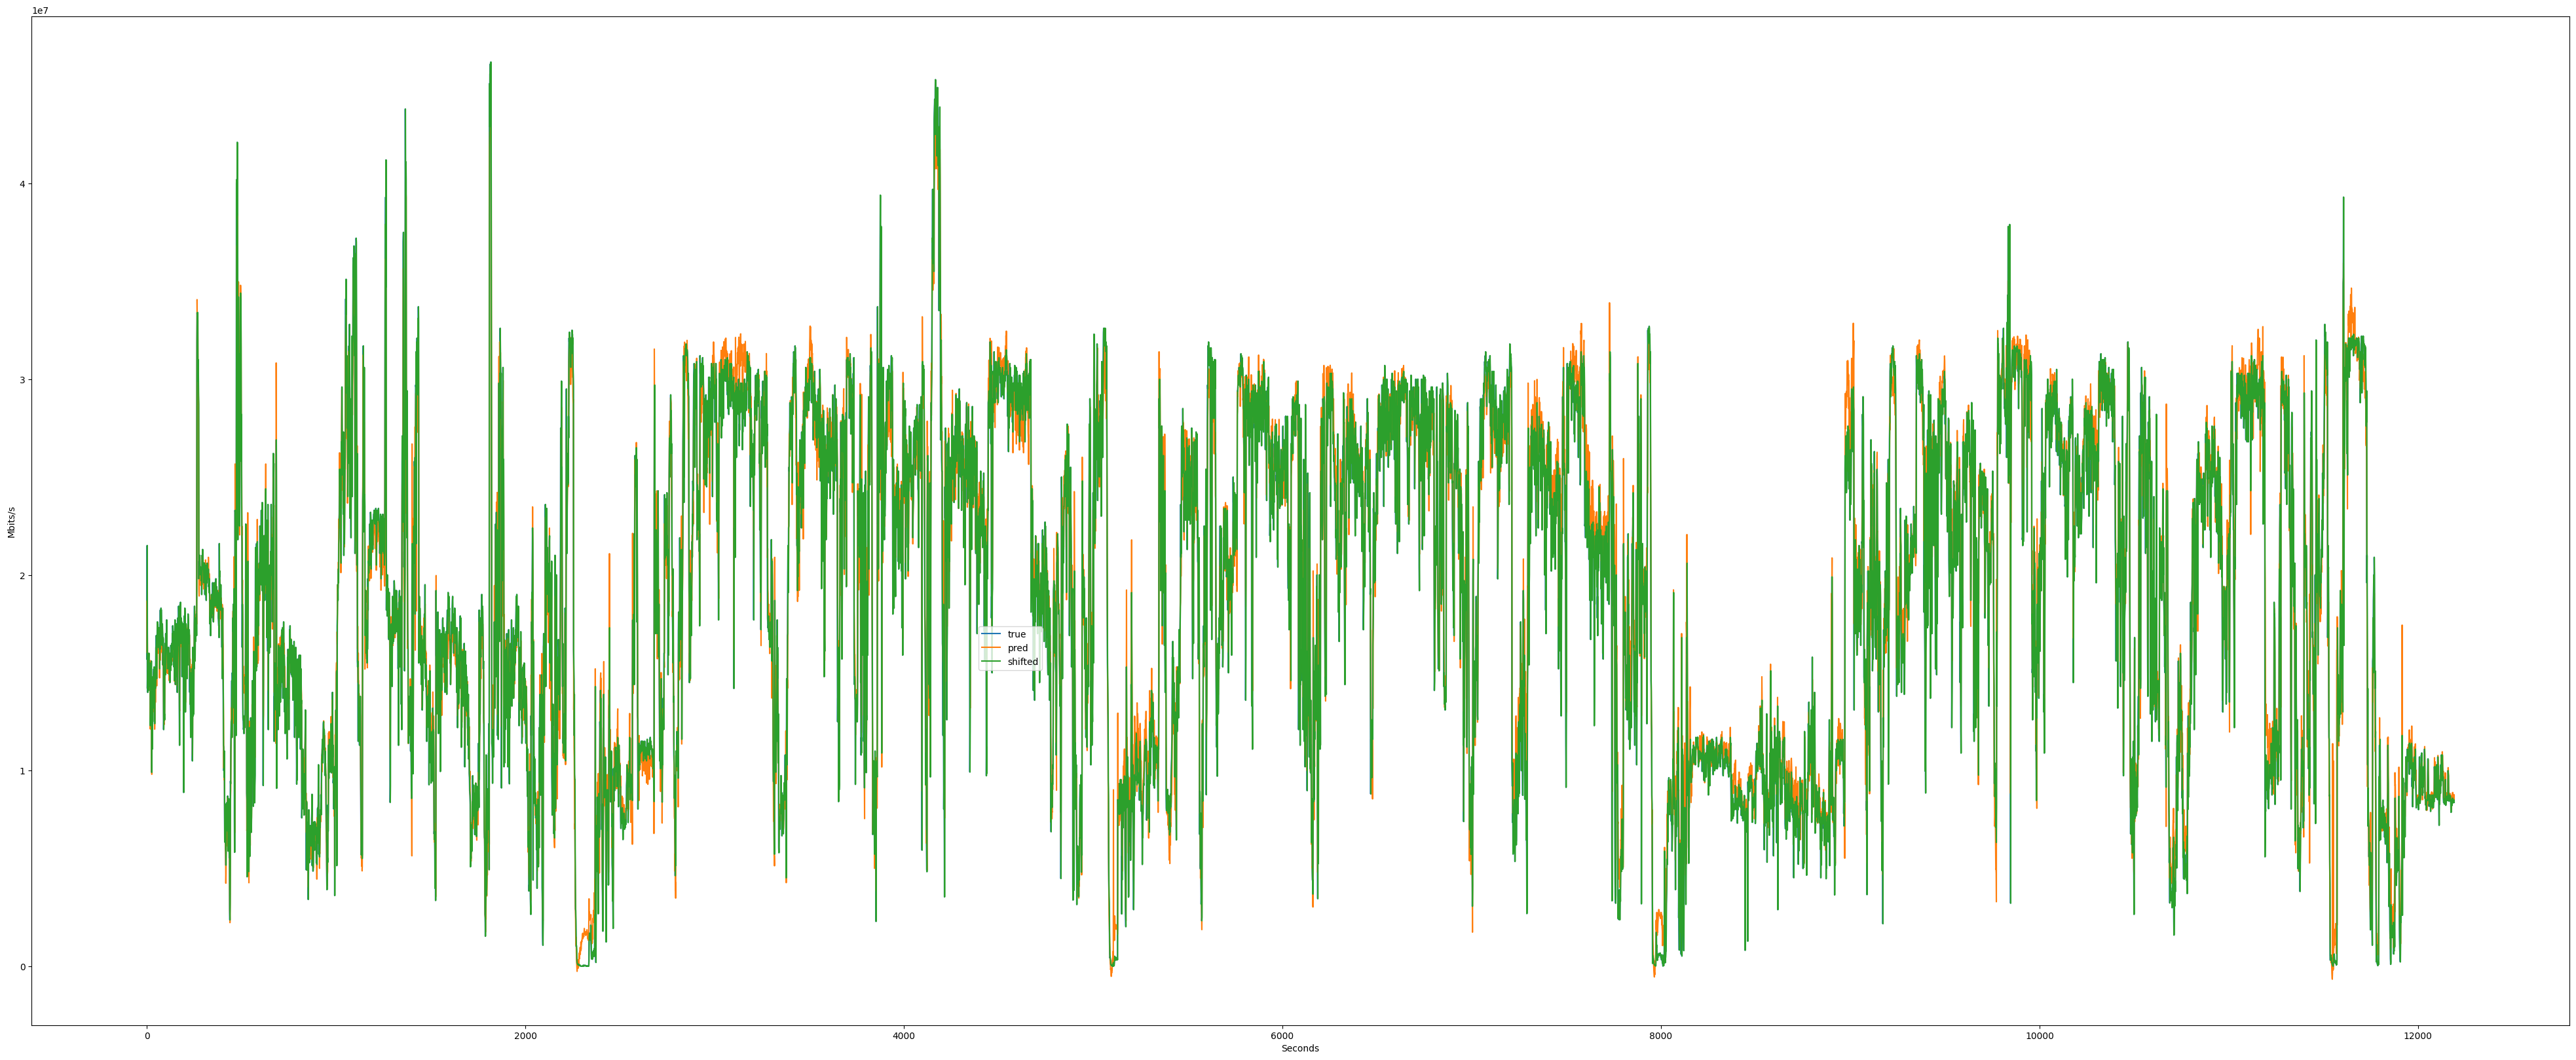

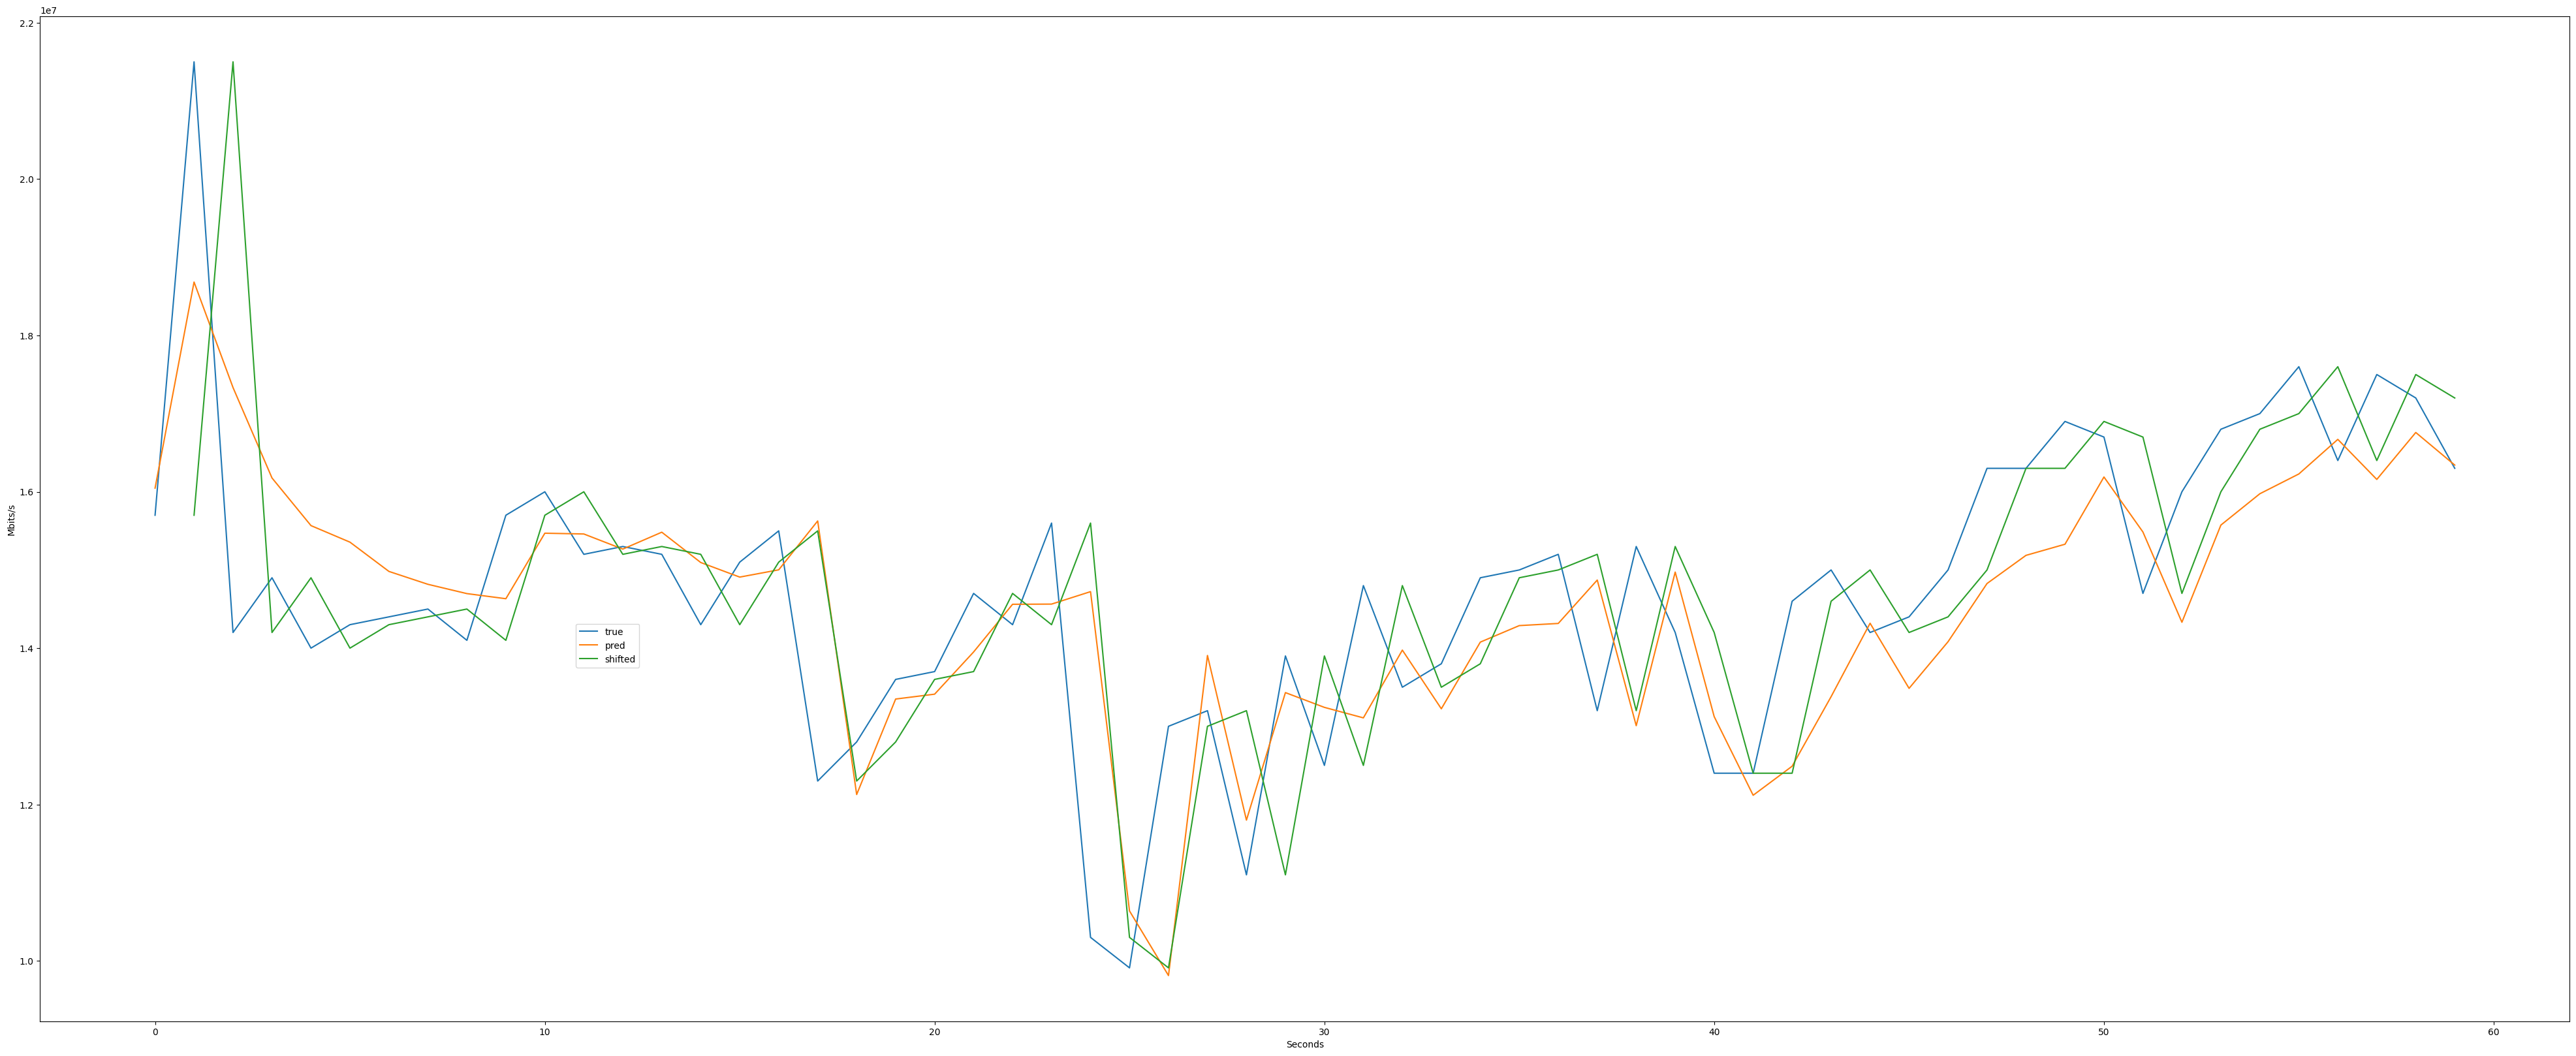

In [8]:
UNIVARIATE = True
if UNIVARIATE:
    df = pd.DataFrame({'true': true.flatten(), 'pred': pred.flatten()})
    df['shifted'] = df['true'].shift(1)

    true = df['true']
    pred = df['pred']
    shifted = df['shifted']

    print('used true[1:], pred[1:] and shifted[1:]')
    print(f'mse for true vs pred: {mean_squared_error(true[1:], pred[1:])}, true vs shifted {mean_squared_error(true[1:], shifted[1:])}')
    print(f'mae for true vs pred: {mean_absolute_error(true[1:], pred[1:])}, true vs shifted {mean_absolute_error(true[1:], shifted[1:])}')

    df.plot(figsize=(50, 20))
    #plt.title('Prediction on LTE dataset')
    # adding Label to the x-axis
    plt.xlabel('Seconds')
    plt.ylabel('Mbits/s')
    # adding legend to the curve
    plt.legend(bbox_to_anchor=(0.4, 0.4))
    plt.savefig(f'plots/{DATA}-full.pdf', bbox_inches='tight')

    scope = 60
    df.head(scope).plot(figsize=(50, 20))
    #plt.title('Prediction on LTE dataset')
    # adding Label to the x-axis
    plt.xlabel('Seconds')
    plt.ylabel('Mbits/s')
    # adding legend to the curve
    plt.legend(bbox_to_anchor=(0.21, 0.4))
    plt.savefig(f'plots/{DATA}-{scope}.pdf', bbox_inches='tight')

In [9]:
MULTI_VARIATE = False
if MULTI_VARIATE:
    df_true_0 = pd.DataFrame.from_records(df_true.iloc[0])
    df_pred_0 = pd.DataFrame.from_records(df_pred.iloc[0])

    plt.figure(figsize=(16, 8), dpi=150)

    df_true_0.plot(subplots=True, label='true')
    df_pred_0.plot(subplots=True, label='pred')

    plt.title('Informer Multivariate')
    # adding Label to the x-axis
    #plt.xlabel('Years')
    # adding legend to the curve
    plt.legend()